In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

## pie chart : 카테고리별 값의 상대적 비교

In [3]:
matplotlib.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [4]:
# pie chart 01

labels = ['샤넬','생로랑','티파니','펜디','에르메스']
datas = [15, 15, 20, 25, 25]
colors = ['whitesmoke','gold','skyblue','rosybrown','orange']

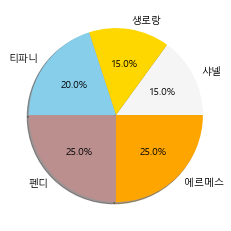

In [5]:
plt.figure()

# (autopct=% %)-->(autopct='% 1.1f% %')-->실수형으로 뒤의 한자리까지 %로 나타냄 
plt.pie(datas, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')

plt.show()
plt.close()

In [6]:
# pie chart 02

pieDF = pd.read_csv('./data/auto-mpg.csv', header=None)
pieDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [7]:
# count를 세기위한 파생변수 만들기

pieDF['cnt']=1

In [8]:
pieDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [9]:
# 제조 국가별(origin) 차량갯수를 %로 나타내기

originDF = pieDF.groupby('origin').sum()
originDF.index 

Int64Index([1, 2, 3], dtype='int64', name='origin')

In [10]:
# pie chart의 labels로 쓰려고 했지만[1,2,3]이여서 인덱스의 이름을 정해야함

originDF.index = ['USA','EU',"KOR"]
originDF.index

Index(['USA', 'EU', 'KOR'], dtype='object')

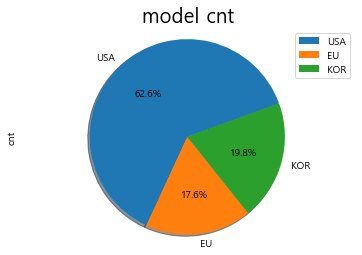

In [11]:
# dataframe으로 바로적용

plt.figure()

originDF['cnt'].plot(kind='pie', autopct='%1.1f%%', startangle=20, shadow=True) # startangle-->pie를 나누는 시작점
plt.title('model cnt', size=20)
plt.legend(labels=originDF.index, loc='upper right')
plt.axis('equal') # pie를 원형에 가깝게 만듦

plt.show()
plt.close()

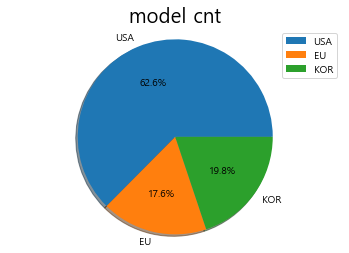

In [12]:
# ple.pie()로 적용

plt.figure()

plt.pie(originDF['cnt'].values, labels=originDF.index, shadow=True, autopct='%1.1f%%')
plt.title('model cnt', size=20)
plt.legend(labels=originDF.index, loc='upper right')
plt.axis('equal')

plt.show()
plt.close()

In [13]:
# cylinders별 차량갯수를 %로 나타내기

cylinderDF = pieDF.groupby('cylinders').sum()
cylinderDF.index = ['cyl3','cyl4','cyl5','cyl6','cyl8']
cylinderDF

,mpg,displacement,weight,acceleration,model year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


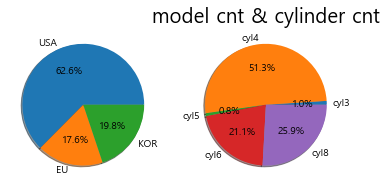

In [14]:
# 제조 국가별(origin) 차량갯수와 cylinders별 차량갯수를 subplot을 이용해 나타내기

fig = plt.figure()

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.pie(originDF['cnt'].values, labels=originDF.index, shadow=True, autopct='%1.1f%%')
ax02.pie(cylinderDF['cnt'].values, labels=cylinderDF.index, shadow=True, autopct='%1.1f%%')
plt.title('model cnt & cylinder cnt', size=20)

plt.show()
plt.close()

## histogram : 구간에 대한 데이터 집계
- 변수가 하나인 단변수 데이터의 빈도 수를 시각화

In [15]:
# histogram 01

datas = np.random.randn(1000)
datas

array([-8.01040607e-01,  1.68606547e+00, -6.08214444e-01,  1.16136435e-01,
       -2.03090795e+00,  6.24578747e-02,  2.31397632e-01,  8.69330642e-02,
        3.02540048e-02,  9.95035852e-01, -1.50685956e+00, -2.35599059e-01,
        2.67843611e-01, -4.44056536e-01, -1.58858161e-01, -2.24234217e-01,
        1.75412496e+00,  2.25998235e+00, -4.71066560e-01, -5.09776441e-01,
       -1.78192250e+00,  3.45975697e-01,  1.79127923e-01,  3.92421469e-01,
       -1.82806973e-02, -9.84515271e-01,  6.16240774e-01,  1.27611137e+00,
       -4.52143167e-01,  7.01011318e-02,  4.26390211e-01, -3.25119357e-01,
        1.05367373e+00, -8.61376767e-01,  4.98746297e-01,  1.45641452e+00,
        2.12780037e-01, -5.37218519e-01,  7.50640256e-01,  1.01189895e-01,
       -1.91013595e+00,  1.34784315e+00,  7.63038209e-01,  9.98713923e-01,
        1.87576078e+00, -3.19481551e-01, -1.79443981e+00, -8.91053670e-01,
        1.23153816e+00,  6.47223155e-01,  5.77926978e-01, -8.04258758e-01,
       -9.18411195e-01, -

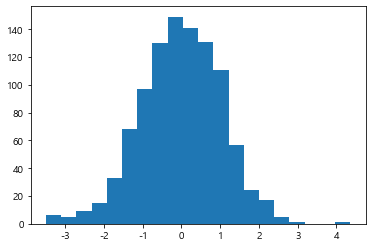

In [16]:
plt.figure()

plt.hist(datas, bins=20) # bins-->막대의 width, 클수록 막대가 촘촘해짐

plt.show()
plt.close()

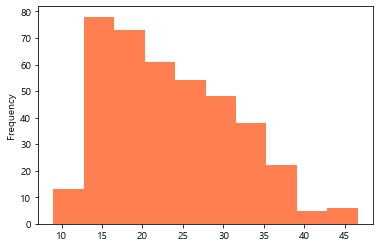

In [17]:
# histogram 02

pieDF['mpg'].plot(kind='hist', color='coral')

plt.show()
plt.close()

## koweps_visualization.xlsx[test]

In [19]:
rowDF = pd.read_excel('./data/koweps_visualization.xlsx')
rowDF

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [ ]:
rowDF.info()

In [ ]:
from IPython.display import Image

Image('c:/Users/ruby/Jupyter/numpy_img/koweps_img.png', width = 500)

### 문제1.

In [ ]:
subsetDF = rowDF[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']] 
subsetDF.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
subsetDF.head()

In [ ]:
# 데이터 분석 (조사 대상자들에 대한 성별 분포)

genderDF = subsetDF.filter(['성별'])
genderDF.head()

In [ ]:
# 성별의 값을 남녀로 바꿔서 확인
np.where(subsetDF.filter(['성별']) == 1, '남자', '여자')

# 성별의 값을 남녀로 바꿔서 확인한 값을 성별2 라는 새로운 컬럼에 추가
genderDF['성별2'] = np.where(subsetDF.filter(['성별']) == 1, '남자', '여자')
genderDF.head()

In [ ]:
# 성별의 데이터 분포 확인
genderDF['성별'].value_counts()

# 성별2의 데이터 분포확인을 데이터프레임 형식으로 표현
gender_cnt_df = pd.DataFrame(genderDF['성별2'].value_counts())
gender_cnt_df

In [ ]:
# 성별2의 컬럼명을 인원 수를 알수있는 명으로 바꿈

gender_cnt_df.rename(columns={'성별2' : '명'}, inplace=True)
gender_cnt_df

In [ ]:
# 성별을 비율순으로 정렬

gender_cnt_df.sort_values('명',ascending=True, inplace=True)
gender_cnt_df

In [ ]:
# 데이터 시각화(bar)

plt.figure()

gender_cnt_df.plot.bar(rot=0)

plt.title('성별분포', size=20)
plt.xlabel('성별')
plt.ylabel('명')

# 그래프 중앙에 글씨 넣기
for idx, value in enumerate(list(gender_cnt_df['명'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, horizontalalignment='center', verticalalignment='bottom', color='red')

plt.show()
plt.close()

In [ ]:
# 데이터 시각화(pie chart)

plt.figure()

gender_cnt_df['명'].plot.pie(labels=gender_cnt_df.index, autopct='%1.1f%%', legend=True)

plt.title('성별분포', size=20) 
plt.legend(labels=gender_cnt_df.index, loc='upper right')
plt.axis('equal')

plt.show()
plt.close()

### 문제2. 성별에 따른 일한달의 월 평균 임금의 차이를 분석하여 시각화

- 성별과 일한달의 월 평균 임금 데이터 추출
- 성별을 남자와 여자 변경
- 데이터 정제(결측값 확인, 제거)
- 데이터 분석(성별로 그룹화 그룹별 평균)
- 데이터 시각화

In [ ]:
# 성별과 일한달의 월 평균 임금 데이터 추출

payDF = subsetDF[['성별', '일한달의 월 평균 임금']]
payDF.head()

In [ ]:
# 성별을 남자와 여자로 변경

payDF['성별'] = np.where(payDF.filter(['성별']) == 1, '남자', '여자')
payDF

In [ ]:
# 데이터 정제(결측값 확인, 제거)

payDF.isna().sum()
payDF.dropna(inplace=True)
payDF

In [ ]:
# 데이터 분석(성별로 그룹화, 그룹별 평균)

gender_pay_df = payDF.groupby(['성별']).mean()
gender_pay_df

In [ ]:
# 원하는 차트로 데이터 시각화

plt.figure()

gender_pay_df.plot.bar(rot=0, color='pink')

plt.title('성별분포', size=20)
plt.xlabel('성별')
plt.ylabel('월 평균 임금')

# 그래프 중앙에 글씨 넣기
for idx, value in enumerate(list(gender_pay_df['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    plt.text(idx, value, txt, horizontalalignment='center', verticalalignment='bottom', color='black')

plt.show()
plt.close()

### 문제3.
- 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화

In [ ]:
# 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)

ageDF = subsetDF[['태어난 연도', '일한달의 월 평균 임금']]
ageDF['나이'] = 2021 - subsetDF['태어난 연도'] + 1
ageDF.head()

In [ ]:
# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)

ageDF.isna().sum()
ageDF.dropna(inplace=True)
ageDF.head()

In [ ]:
# 데이터 분석(나이별 따른 급여평균)

age_pay_df = pd.DataFrame(ageDF.groupby('나이')['일한달의 월 평균 임금'].mean())
age_pay_df

In [ ]:
# 데이터 시각화

plt.figure()

plt.plot(age_pay_df, marker='o', markersize=5, color='pink', markerfacecolor='hotpink')
plt.title('나이에 따른 평균 급여 변화', size=20)
plt.xlabel('나이', size=15)
plt.ylabel('평균 급여', size=15)
plt.legend(labels=['나이'], loc='best')

plt.show()
plt.close()

### 문제4.
- 연령대에 따른 분포
- 연령대별 평균 급여 변화
- 성별과 연령대 분포
- 성별과 연령대에 따른 평균 급여 변화
- 지역별 연령층 분포와 연령층별 지역 비율


In [ ]:
subsetDF['성별'] = pd.DataFrame(np.where(subsetDF.filter(['성별']) == 1, '남자', '여자'))
subsetDF['나이'] = 2021 - subsetDF['태어난 연도'] + 1
subsetDF['연령대'] = (subsetDF['나이'] // 10) * 10
subsetDF.head()

In [ ]:
# 연령대별 평균 급여 변화

avg_pay_df = pd.DataFrame(subsetDF.groupby('연령대')['일한달의 월 평균 임금'].mean())
avg_pay

In [ ]:
# 연령대별 평균 급여 변화 시각화

plt.figure()

plt.plot(avg_pay_df, marker='o', markersize=10, color='pink', markerfacecolor='hotpink')
plt.title('연령대별 평균 급여 변화', size=20)
plt.xlabel('연령대', size=15)
plt.ylabel('평균급여', size=15)
plt.legend(labels=['연령대'], loc='best')

plt.show()
plt.close()

In [ ]:
# 성별과 연령대에 따른 평균 급여 변화

sex_pay_df = pd.DataFrame(subsetDF.groupby(['연령대','성별'])['일한달의 월 평균 임금'].mean())
sex_pay_df

In [ ]:
# 성별과 연령대에 따른 평균 급여 변화 시각화



In [ ]:
# 지역별 연령층 분포와 연령층별 지역 비율

### 이상치정제

In [26]:
xls = pd.ExcelFile('./data/car_mpg.xlsx')
dataDF = xls.parse(xls.sheet_names[0])
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [25]:
dataDF.describe() # 수치형으로 되어있는 값들에 대한 기술통계값

,Unnamed: 0,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,3.471795,2003.500000,5.888889,16.858974,23.440171
std,67.694165,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.000000,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,59.250000,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,117.500000,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,175.750000,4.600000,2008.000000,8.000000,19.000000,27.000000
max,234.000000,7.000000,2008.000000,8.000000,35.000000,44.000000


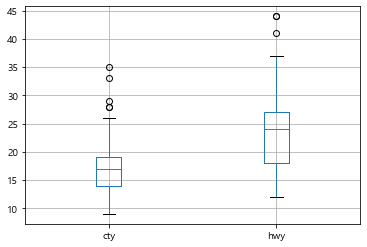

In [32]:
outlierDF = dataDF.filter(['cty', 'hwy'])

plt.figure()
outlierDF.boxplot()
plt.show()
plt.close()

In [34]:
# 분위수의 정보를 얻고자 한다면..?

quantile75 = outlierDF.quantile(q=0.75) # 3사분위 값
quantile75

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [35]:
quantile25 = outlierDF.quantile(q=0.25) # 1사분위 값
quantile25

cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [36]:
# IQR ( Inter Quantile Range ) = 사분위수범위
# Median 중위수

iqr = quantile75 - quantile25
iqr

cty    5.0
hwy    9.0
dtype: float64

In [38]:
# lower fence(최저 한계치)
# upper fence(최고 한계치)

lower_fence = quantile25 - 1.5*iqr
print('lower_fence :\n', lower_fence)

upper_fence = quantile75 + 1.5*iqr
print('upper_fence :\n', upper_fence)

lower_fence :
 cty    6.5
hwy    4.5
dtype: float64
upper_fence :
 cty    26.5
hwy    40.5
dtype: float64


In [42]:
# 극단치 경계 값을 (아래 수평선)
lower_outlier = outlierDF[ outlierDF > lower_fence ].min()
print('lower_outlier :\n', lower_outlier)

# 극단치 경계 값을 (위수평선)

upper_outlier = outlierDF[ outlierDF < upper_fence ].max()
print('upper_outlier :\n', upper_outlier)

lower_outlier :
 cty     9
hwy    12
dtype: int64
upper_outlier :
 cty    26.0
hwy    37.0
dtype: float64


In [46]:
# hwy 연비의 이상치 데이터 추출
hwy_outlier_df = dataDF.query( 'hwy >' + str(upper_outlier['hwy']))
hwy_outlier_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [47]:
cty_outlier_df = dataDF.query( 'cty >' + str(upper_outlier['cty']))
cty_outlier_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
